Instalamos la librería keras_tuner

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


Importamos librerías

In [4]:
# Importamos las librerías básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos paquetes de sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Paquetes de redes neuronales

import tensorflow as tf
from tensorflow import keras

# Paquete de afinamiento para nn de tensorflor

import keras_tuner as kt

Cargamos los datos del problema

In [5]:
url = 'https://raw.githubusercontent.com/juancamiloespana/LEA2/master/_data/credit_card_clients.csv'
df = pd.read_csv(url, index_col=[0])
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,232.457717,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,530.293538,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,4.136829,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [6]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df.dropna(inplace = True)

Separamos la variable respuesta (`PURCHASES`) de la variable explicativa

In [8]:
y = pd.DataFrame(df['PURCHASES'])
X = df.drop(['PURCHASES'], axis = 1)
display(X)
display(y)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,232.457717,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,4.136829,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,0.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,5.871712,0.500000,5.187774,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
C19186,28.493517,1.000000,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19188,23.398673,0.833333,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


,PURCHASES
CUST_ID,
C10001,95.40
C10002,0.00
C10003,773.17
C10005,16.00
C10006,1333.28
...,...
C19184,20.90
C19186,291.12
C19188,144.40


In [9]:
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Realizamos el escalado de las variables. Vamos a guardar la media y la desviación estándar de los datos originales en la variable `sc`. Esto es importante dado que al exportar el modelo (red neuronal) y utilizarlo con otro conjunto de datos, debemos asegurarnos que el escalado se haga con la misma media y desviación estándar con el cual se entrenó el modelo, de lo contrario, ésto puede generar problemas en las predicciones que realice la red neuronal.

In [10]:
sc = StandardScaler().fit(X)
media = sc.mean_
print(media)
sd  = sc.scale_
print(sd)

[1.60122489e+03 8.95035111e-01 1.50007669e+02 4.20843533e+02
 9.94175523e+02 4.96000000e-01 2.05908741e-01 3.68820346e-01
 1.37604204e-01 3.31391848e+00 1.50332330e+01 4.52209103e+03
 1.78447810e+03 8.64304943e+02 1.59303625e-01 1.15343909e+01]
[2.09544997e+03 2.07684850e-01 4.90532691e+02 9.17192075e+02
 2.12133547e+03 4.01249407e-01 3.00036234e-01 3.98069895e-01
 2.01779747e-01 6.91210589e+00 2.51790105e+01 3.65902851e+03
 2.90964162e+03 2.37242898e+03 2.96253756e-01 1.31090776e+00]


Importamos librería para exportar las medias y desviaciones estándar de las variables.

In [11]:
import joblib

In [12]:
joblib.dump( sc, "/content/drive/MyDrive/Analitica /Trabajo DL/sc.joblib")

['/content/drive/MyDrive/Analitica /Trabajo DL/sc.joblib']

Realizamos el escalado a las variables explicativas

In [13]:
X_sc = sc.transform(X)
X_sc

array([[-0.74462486, -0.37004679, -0.30580565, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.30580565, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465,  0.16808268, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.30580565, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.30580565, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.600569  , ..., -0.32709767,
        -0.53772694, -4.22180042]])

Partimos los datos en testing y training

In [14]:
X_tr, X_te, y_tr, y_te = train_test_split(X_sc, y, test_size=0.2)

**Arquitectura de la red neuronal base**

In [15]:
ann1 = keras.models.Sequential([
    keras.Input(shape=(16,)),
    keras.layers.Dense(8, activation='linear'),
    keras.layers.Dense(1, activation="relu")
])

ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


En total se tienen 47.617 parámetros entre pesos y sesgos para las cinco capas. Esto es importante porque esto define los grados de libertad que se tendrán para cada parámetro. En este caso 8950/47617 da 0,1879. Eso representa una proporción de cuánta información tenemos para estimar cada parámetro.

A continuación se pueden observar dichos parámetros.

In [16]:
ann1.get_weights()

[array([[ 0.47942948, -0.34157896, -0.198066  , -0.16703737, -0.46360707,
         -0.3811351 ,  0.36235976,  0.40677536],
        [ 0.22201014, -0.00766182,  0.3229177 ,  0.2874173 ,  0.23348618,
         -0.46253014,  0.04046261,  0.0431428 ],
        [ 0.18151617,  0.15470064,  0.10400248,  0.11177266,  0.1857388 ,
          0.18546915,  0.376585  , -0.0638603 ],
        [-0.3889078 ,  0.22410262,  0.10321724, -0.10305727, -0.35695255,
         -0.10427094,  0.04778981,  0.17798793],
        [ 0.08816266, -0.4643556 , -0.24592757, -0.13120055, -0.20113003,
         -0.3737222 , -0.24802577,  0.4033587 ],
        [-0.38514352,  0.44881892, -0.19609094,  0.13645983, -0.13944578,
         -0.03851533, -0.4407369 ,  0.36226714],
        [ 0.35286152, -0.09955847,  0.22837877, -0.30575287, -0.16105223,
         -0.40754175, -0.48048365, -0.24572384],
        [ 0.02571392, -0.17374015,  0.42444396,  0.07871687, -0.286525  ,
         -0.3551122 ,  0.15316617,  0.15080893],
        [ 0.0448

Función de pérdida, métrica de desempeño y optimizador de función de pérdida.

In [17]:
m2 = keras.metrics.MeanAbsoluteError(name='MAE') # Definimos la métrica, NO UTILIZAMOS MAPE PORQUE PURCHASES TOMA VALORES DE CERO.
loss = keras.losses.MeanSquaredError()# Definimos la función de pérdida
opt= keras.optimizers.Adam(learning_rate=0.01) # Definimos el optimizador de la función de pérdida

In [18]:
ann1.compile(optimizer= opt , loss = loss, metrics = m2)
ann1.fit(X_tr, y_tr, epochs = 10 , validation_data=(X_te,y_te))

Epoch 1/10
216/216 [==============================] - 2s 4ms/step - loss: 5097781.5000 - MAE: 963.3938 - val_loss: 5731976.5000 - val_MAE: 921.2729
Epoch 2/10
216/216 [==============================] - 1s 3ms/step - loss: 3723930.5000 - MAE: 745.4018 - val_loss: 3759843.5000 - val_MAE: 664.5671
Epoch 3/10
216/216 [==============================] - 1s 3ms/step - loss: 2417371.0000 - MAE: 578.4081 - val_loss: 2495537.5000 - val_MAE: 566.4475
Epoch 4/10
216/216 [==============================] - 1s 3ms/step - loss: 1768479.6250 - MAE: 540.9385 - val_loss: 1914027.0000 - val_MAE: 550.2130
Epoch 5/10
216/216 [==============================] - 1s 3ms/step - loss: 1480996.7500 - MAE: 526.9238 - val_loss: 1605908.7500 - val_MAE: 527.6887
Epoch 6/10
216/216 [==============================] - 1s 3ms/step - loss: 1314187.8750 - MAE: 510.4638 - val_loss: 1410069.1250 - val_MAE: 504.3863
Epoch 7/10
216/216 [==============================] - 1s 3ms/step - loss: 1194347.0000 - MAE: 488.4616 - val_los

**Diagnóstico**: se diagnostica underfitting dado que el MAE es el promedio de la diferencia absoluta entre el valor observado y los valores predichos. Dado que se están prediciendo las compras de los clientes, se considera que una diferencia de 300 dólares entre el valor observado y el valor predicho es relativamente alto.

Por esta razón, se considera underfitting.

# Afinamiento de hiperparámetros


Dado que se tiene underfitting, debemos complejizar el modelo.

***Afinamiento manualmente***

In [19]:
ann2 = keras.models.Sequential([
    keras.Input(shape=(16,)),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation="relu")
])

In [20]:
m2 = keras.metrics.MeanAbsoluteError(name='MAE') # Definimos la métrica, NO UTILIZAMOS MAPE PORQUE PURCHASES TOMA VALORES DE CERO.
loss = keras.losses.MeanSquaredError()# Definimos la función de pérdida
opt= keras.optimizers.Adam(learning_rate=0.001) # Definimos el optimizador de la función de pérdida

ann2.compile(optimizer= opt , loss = loss, metrics = m2)
ann2.fit(X_tr, y_tr, epochs = 20 , validation_data=(X_te,y_te))

Epoch 1/20
216/216 [==============================] - 2s 4ms/step - loss: 2309994.5000 - MAE: 685.7038 - val_loss: 1029704.1250 - val_MAE: 473.5120
Epoch 2/20
216/216 [==============================] - 1s 3ms/step - loss: 845570.0000 - MAE: 440.1611 - val_loss: 675968.9375 - val_MAE: 374.0785
Epoch 3/20
216/216 [==============================] - 1s 3ms/step - loss: 687305.1250 - MAE: 365.9934 - val_loss: 594038.8750 - val_MAE: 343.1754
Epoch 4/20
216/216 [==============================] - 1s 3ms/step - loss: 651983.0000 - MAE: 345.3474 - val_loss: 581268.6875 - val_MAE: 321.4423
Epoch 5/20
216/216 [==============================] - 1s 3ms/step - loss: 633347.3125 - MAE: 336.7100 - val_loss: 620918.8750 - val_MAE: 347.3773
Epoch 6/20
216/216 [==============================] - 1s 3ms/step - loss: 639475.8750 - MAE: 325.5311 - val_loss: 565153.8750 - val_MAE: 326.2723
Epoch 7/20
216/216 [==============================] - 1s 3ms/step - loss: 641786.3125 - MAE: 335.7908 - val_loss: 549835.3

Al realizar el ajuste manual, dado que el modelo necesita se complejizado se agregan capas y neuronas así mimo se ponen a prueba las funciones de activación para regresión ‘relu’ y ‘liniear’. Al realizar estos ajustes, las actualizaciones de los parámetros mejoran la métrica de desempeño, dado que a medida que los epocs aumentan se estabiliza el error absoluto medio tanto en comparación con sus corridas anteriores como en las corridas de la primera red.

**Grilla de hiperparámetros.**




In [21]:
hp=kt.HyperParameters()
lo=keras.losses.MeanSquaredError()
name_metr="MAE"
m4=keras.metrics.MeanAbsoluteError(name=name_metr)

Tomamos la red neuronal inicial, se ajustan los valores en un rango de base 2^n para evaluar la cantidad de neuronas a utilizar en cada una de las capas.Dado que se tiene un problema de underfitting y es necesario complejizar el modelo, se decide iterar sobre la cantidad de neuronas que se tienen en cada capa. Como se observa, damos valores mínimos y máximos que sean potencias de dos, y el step en este caso corresponde a 64 (2**6), para que itere en potencias de dos.

 Así mismo evaluamos en las funciones de optimización Adam y sgd para que con la combinación de las iteraciones se evalúe cúal es la mejor combinación.

In [22]:
def tun_model(hp):

    neuronas_c1 =hp.Int('c1', min_value= 2**8, max_value=2**12, step = 64)
    neuronas_c2 =hp.Int('c2', min_value= 2**7, max_value= 2**11, step= 64)
    neuronas_c3 =hp.Int('c3', min_value= 2**6 , max_value= 2**10, step = 64)
    opt=hp.Choice('opt', ['adam','sgd'])


    ann2 = keras.models.Sequential([
    keras.Input(shape=(16,)),
    keras.layers.Dense(neuronas_c1, activation='linear'),
    keras.layers.Dense(neuronas_c2, activation='relu'),
    keras.layers.Dense(neuronas_c3, activation='relu'),
    keras.layers.Dense(1, activation="relu")
    ])


    if opt== 'adam':
        opt=keras.optimizers.Adam(learning_rate=0.001)
    else:
        opt=keras.optimizers.SGD(learning_rate=0.001)

    ann2.compile(optimizer=opt, loss=loss, metrics=m4 )

    return ann2

In [23]:
#search_model=kt.RandomSearch(
    #hypermodel=tun_model,
    #hyperparameters=hp,
    #objective=kt.Objective(name_metr, direction="min"),
    #max_trials=20,
    #overwrite=True,
    #project_name="resultados",

#)

#search_model.search(X_tr, y_tr, epochs=10, validation_data=(X_te,y_te))
#search_model.results_summary()

#best_model=search_model.get_best_models(num_models=3)[0]
#hps=search_model.get_best_hyperparameters(5)[0]
#hps.values


#best_model.build()
#best_model.summary()


Cuando la grilla de hiperparámetros nos arroje el mejor modelo, el número de neuronas que se tengan para cada capa de dicho modelo serán las cuales se utilizarán como modelo final. Observamos que al realizar la búsqueda de los mejores hiperparámetros, se obtienen lo siguientes resultados:



```
# Trial 05 summary
Hyperparameters:
c1: 3264
c2: 1664
c3: 384
opt: adam
Score: 268.1263732910156
```

Notamos pues que aunque la grilla de hiperparámetros sí trató de minimizar con respecto al modelo inicial `ann_1`, sigue siendo mejor la red neuronal ajustada de manera manual por nosotros. Por esta razón, nos quedaremos con dicha configuración de hiperparámetros, la cual se observa a continuación:


```
# Modelo ajustando hiperparámetros manualmente:
c1: 256
c2: 128
c3: 64
opt: adam
Score: MAE: 260.1301
```







Notamos que realmente para minimizar y mejorar la red neuronal requeriríamos aumentar el número de capas, porque vemos que aunque el trial 05 tiene más neuronas, el desempeño no es tan óptimo como el modelo ajustado manualmente.

Seleccionamos este modelo como el ganador, y lo preparamos para ser exportado

In [24]:
joblib.dump(ann2, '/content/drive/MyDrive/Analitica /Trabajo DL/ann2.joblib')

['/content/drive/MyDrive/Analitica /Trabajo DL/ann2.joblib']

**Evaluación del modelo**

In [25]:
y_pred = ann2.predict(X_te)
display(y_pred.shape)

y_actual=np.array(y_te['PURCHASES'])
display(y_actual.shape)

y_pred=np.array(y_pred)[:,0]
display(y_pred.shape)


54/54 [==============================] - 0s 2ms/step


(1728, 1)

(1728,)

(1728,)

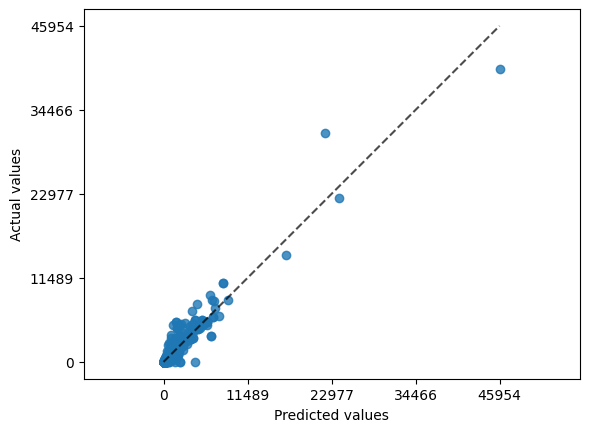

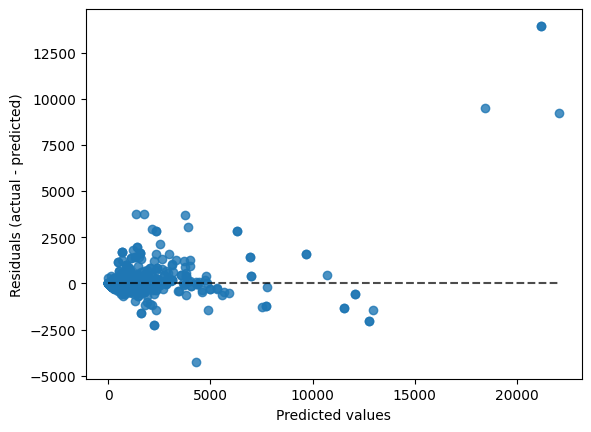

In [26]:
import sklearn.metrics as metrics
metrics.PredictionErrorDisplay.from_predictions(y_true=y_actual,y_pred=y_pred, kind="actual_vs_predicted")
metrics.PredictionErrorDisplay.from_predictions(y_true=y_actual,y_pred=y_pred, kind="residual_vs_predicted")

# Entrega 2

In [39]:
url2 = 'https://raw.githubusercontent.com/juancamiloespana/LEA2/master/_data/credit_card_clients2.csv'
df2 = pd.read_csv(url2, index_col=[0])
df2

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,232.457717,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,530.293538,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,4.136829,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [40]:
display(df2.isnull().sum())
df2.dropna(inplace = True)

BALANCE                               0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [41]:
df2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [42]:
X_new = df2
X_new

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.000000,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,232.457717,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,4.136829,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,0.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,5.871712,0.500000,5.187774,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
C19186,28.493517,1.000000,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19188,23.398673,0.833333,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [43]:
sc2 = joblib.load("/content/drive/MyDrive/Analitica /Trabajo DL/sc.joblib")

In [44]:
ann2_load = joblib.load('/content/drive/MyDrive/Analitica /Trabajo DL/ann2.joblib')
ann2_load.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               4352      
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45569 (178.00 KB)
Trainable params: 45569 (178.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
X2sc=sc.transform(X_new)

In [49]:
pred_new=ann2.predict(X2sc)
X_new["PURCHASES_PRED"]= pred_new
X_new.sort_values('PURCHASES_PRED', ascending=False)

270/270 [==============================] - 0s 2ms/step


,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_PRED
CUST_ID,,,,,,,,,,,,,,,,,
C11300,4010.621974,1.000000,11942.145893,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.727850,703.503256,1.000000,12,45954.234375
C11657,3391.702180,1.000000,15668.516291,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.625930,716.027656,1.000000,12,42555.492188
C10523,13479.288210,1.000000,12916.521202,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.750680,15914.484620,0.083333,12,35001.445312
C10284,5131.319584,1.000000,7826.681852,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.344320,1971.129435,0.083333,12,27190.353516
C13802,3012.178613,1.000000,3778.051225,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0,27839.823540,569.401398,0.727273,12,26102.486328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C18648,3911.628474,0.875000,0.000000,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8,0.000000
C12841,1519.396916,1.000000,0.000000,0.00,1825.201472,0.000000,0.000000,0.000000,0.333333,11,0,2000.0,412.126381,527.787946,0.000000,12,0.000000
C14980,1456.399956,0.909091,0.000000,0.00,4116.968065,0.000000,0.000000,0.000000,0.727273,34,0,2500.0,2793.487295,545.874795,0.000000,11,0.000000


**Análisis de los errores**

699.2635691645954

41.71576136666316

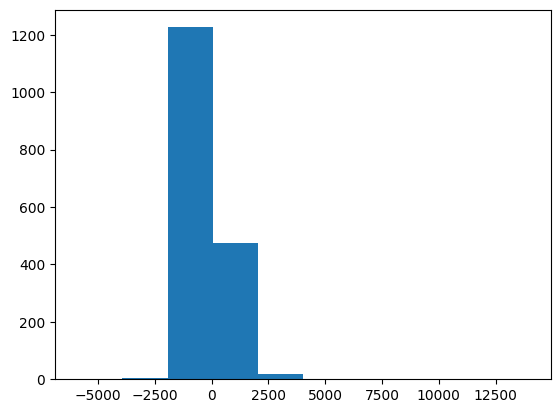

In [55]:
res=y_actual-y_pred

display(np.std(res))
display(np.mean(res))
plt.hist(res, bins=10);

Basados en el gráfico anterior, se puede observar que hay una sobreestimación de los valores predichos en el valor de las compras, ya que los valores predichos son más altos que los valores actuales.

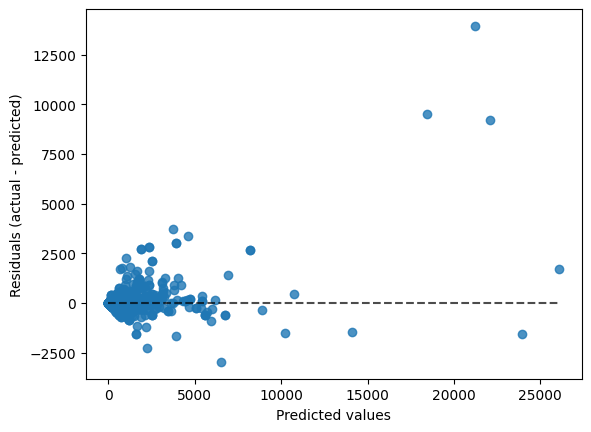

In [54]:
metrics.PredictionErrorDisplay.from_predictions(y_true=y_actual,y_pred=y_pred, kind="residual_vs_predicted")

Por otro lado, en el análisis de los residules vs predichos, es posible notar una especie de patrón de embudo, lo cual indica que se pueden estar violando algunos de los supuestos de la regresión lineal, como la homocedasticidad.

**Predicción del número de compras de cada cliente**

In [58]:
pd.DataFrame(X_new['PURCHASES_PRED'])

,PURCHASES_PRED
CUST_ID,
C10001,162.503632
C10002,29.261442
C10003,1294.380493
C10005,200.419769
C10006,1309.216919
...,...
C19184,470.048492
C19186,386.680206
C19188,291.796875


En el dataframe anterior observamos las predicciones del valor de las compras realizadas por cada cliente.

In [67]:
suma_compras_actuales = df['PURCHASES'].sum()
print("El valor total de las compras del periodo Enero - Junio 2023 de todos los clientes es: ", suma_compras_actuales, 'USD')

El valor total de las compras del periodo Enero - Junio 2023 de todos los clientes es:  8855646.94 USD


In [68]:
suma_compras_predichas = X_new['PURCHASES_PRED'].sum()
print("El valor total estimado de las compras de todos los clientes para el periodo Julio - Diciembre 2023 es: ", suma_compras_predichas, 'USD')

El valor total estimado de las compras de todos los clientes para el periodo Julio - Diciembre 2023 es:  8529720.0 USD


In [69]:
diferencia = suma_compras_actuales - suma_compras_predichas
print(diferencia)

325926.9399999995


Basados en las predicciones realizadas por el modelo para el segundo semestre de 2023, se espera que las compras del grupo de clientes disminuyan en aproximadamente 325.926 dólares.

**Clientes con mayores compras**

In [70]:
X_new.sort_values('PURCHASES_PRED', ascending=False).head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_PRED
CUST_ID,,,,,,,,,,,,,,,,,
C11300,4010.621974,1.0,11942.145893,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12,45954.234375
C11657,3391.702180,1.0,15668.516291,5098.87,0.000000,1.000000,1.000000,1.000000,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12,42555.492188
C10523,13479.288210,1.0,12916.521202,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12,35001.445312
C10284,5131.319584,1.0,7826.681852,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12,27190.353516
C13802,3012.178613,1.0,3778.051225,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0,27839.82354,569.401398,0.727273,12,26102.486328


En el dataframe se pueden observar los clientes que se espera que tengan mayores compres para el semestre dos del año 2023.

**Intervalos de confianza**

A continuación observamos el valor de las compras de estos mismos clientes en el primer semestre del 2023. Vamos a utilizar estos valores para construir el intervalo de confianza para el valor arrojado por las predicciones para esos mismos clientes en el semestre dos de 2023.

In [98]:
clientes_estrella = pd.DataFrame(X_new.loc[['C11300','C11657','C10523','C10284','C13802']]['PURCHASES_PRED'])
clientes_estrella

,PURCHASES_PRED
CUST_ID,
C11300,45954.234375
C11657,42555.492188
C10523,35001.445312
C10284,27190.353516
C13802,26102.486328


In [105]:
import numpy as np
from scipy import stats


media = np.mean(clientes_estrella)
desviacion_estandar = np.std(clientes_estrella, ddof=1)  # Usar ddof=1 para calcular la desviación estándar muestral

t_valor = stats.t.ppf((1 + confianza) / 2, df=len(clientes_estrella) - 1)  # Calcular el valor crítico t

margen_error = t_valor * (desviacion_estandar / np.sqrt(len(clientes_estrella)))

print("Valor crítico t:", t_valor)
print("Margen de error:", margen_error)


Valor crítico t: 2.7764451051977987
Margen de error: PURCHASES_PRED    11046.380859
dtype: float32


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [107]:
clientes_estrella['Cota inferior'] = clientes_estrella['PURCHASES_PRED'] - 11046.380859
clientes_estrella['Cota superior'] = clientes_estrella['PURCHASES_PRED']+ 11046.380859
clientes_estrella

,PURCHASES_PRED,Cota inferior,Cota superior
CUST_ID,,,
C11300,45954.234375,34907.851562,57000.617188
C11657,42555.492188,31509.111328,53601.875000
C10523,35001.445312,23955.064453,46047.828125
C10284,27190.353516,16143.972656,38236.734375
C13802,26102.486328,15056.105469,37148.867188


Con un nivel de confianza de un 95%, el valor real de la compra en el semestre dos debería moverse entre la cota inferior y la cota superior para cada cliente. Es decir, se espera que el cliente C11300 tenga compras entre 34907.851562 y 57000.617188 dólares para el segundo semestre del 2023, y así para cada uno de los clientes.

**Estrategias para mejorar el nivel de compras de cada cliente**

**Estrategia 1**: analizar según la predicción del modelo cúales clientes son quienes harán compras inferiores a las del semestre anterior. Basados en esto, se decide darle a estos clientes una reducción en las tasas de interés de la tarjeta para incentivar su uso.

**Estrategia 2**: a los primeros cinco clientes que prediga el modelo se les otorgará un beneficio especial redimible, como por ejemplo; un viaje, bonos de compra en supermercados, crédito de libre inversión a una tasa baja.

**Estrategia 3**: segmentar nuestros clientes en tres grupos : silver, gold y diamond. Quienes el modelo prediga que tendrán mayores compras, se les clasificará como diamond, y clasificar así según el nivel de compras predichas.

Para cada grupo se les dará diferentes beneficios.
